In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import fibsem
from fibsem.imaging import masks
from fibsem.imaging import utils
from autoscript_sdb_microscope_client.structures import AdornedImage
from PIL import Image

import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from skimage import data
from skimage import filters
from skimage.color import rgb2gray

import imageio
import cv2




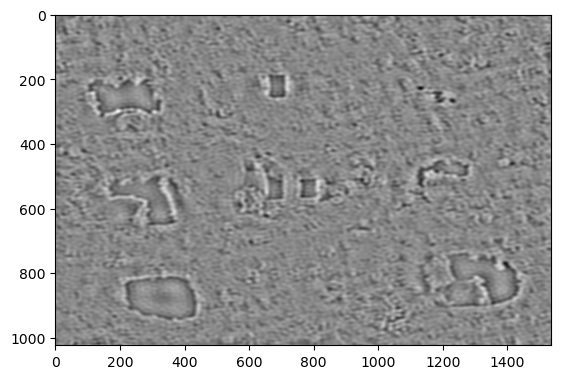

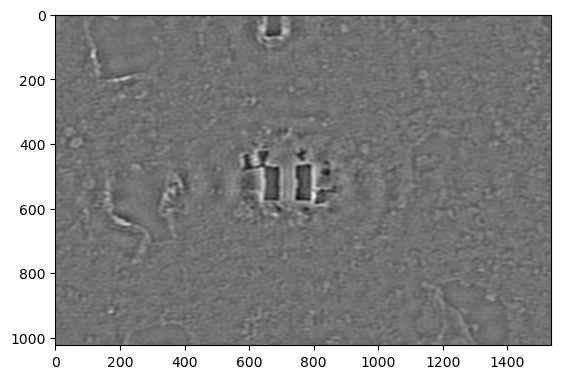

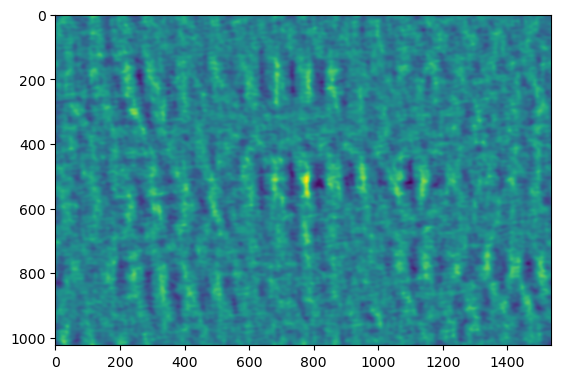

In [201]:
img4 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_eb_drift_correction_lamella_low_res_0_eb.tif")
img5 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_eb_drift_correction_lamella_low_res_0_ib.tif")

img4 = AdornedImage(img4, None)
img5 = AdornedImage(img5, None)
#img4 = AdornedImage(np.roll(img4, shift=(400, 400), axis=(0, 1)))

pixelsize_img4 = img4.data.shape
pixelsize_img5 = img5.data.shape

img4_mask = masks.create_bandpass_mask(pixelsize_img4, 100, 4, 3)
img5_mask = masks.create_bandpass_mask(pixelsize_img5, 100, 4, 3)
masks.create_bandpass_mask()

img4fft = np.fft.ifftshift(img4_mask * np.fft.fftshift(np.fft.fft2(img4.data)))
img5fft = np.fft.ifftshift(img5_mask * np.fft.fftshift(np.fft.fft2(img5.data)))


n_pixels = img4.data.shape[0] * img4.data.shape[1]
img4fft[0, 0] = 0
tmp = img4fft * np. conj(img4fft)
img4fft = n_pixels * img4fft / np.sqrt(tmp.sum())

n_pixels = img5.data.shape[0] * img5.data.shape[1]
img5fft[0, 0] = 0
tmp = img5fft * np. conj(img5fft)
img5fft = n_pixels * img5fft / np.sqrt(tmp.sum())

plt.imshow(np.real(np.fft.fftshift(np.fft.ifftshift(np.fft.ifft2(img4fft)))), cmap='gray')
plt.show()
plt.imshow(np.real(np.fft.fftshift(np.fft.ifftshift(np.fft.ifft2(img5fft)))), cmap='gray')
plt.show()

xcorr = np.real(np.fft.fftshift(np.fft.ifft2(img4fft * np.conj(img5fft))))
plt.imshow(xcorr)
plt.show()


In [202]:
np.amax(xcorr)

121278.26387435514

In [198]:
threshold  = filters.threshold_otsu(img4)
binary_img = (img4 > threshold)*1

plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
plt.imshow(binary_img, cmap='gray')

threshold = filters.threshold_niblack(img4)

binary_img = (img4 > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
plt.imshow(binary_img)

threshold = filters.threshold_sauvola(img4)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
plt.imshow(threshold, cmap = "gray")

binary_img = (img4 > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola - 0's and 1's")
plt.imshow(binary_img, cmap = "gray")

AttributeError: 'AdornedImage' object has no attribute 'ndim'

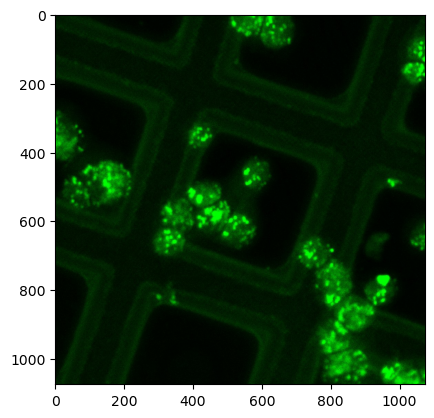

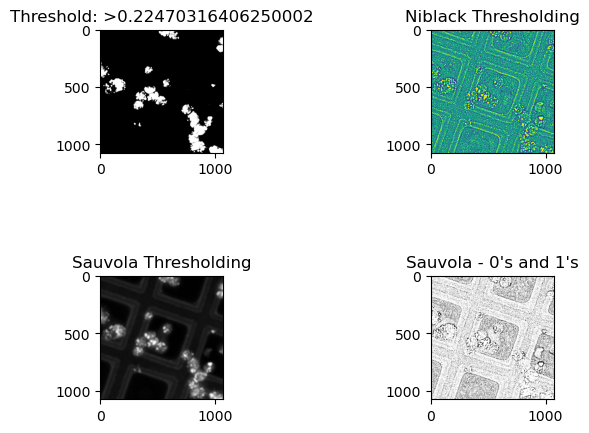

In [ ]:
img4 = Image.open("C:/Users/phipo/Documents/GitHub/PIE scope/test/pics/1-fl-ZOOM.jpg")
plt.imshow(img4)
plt.show()
img4 = rgb2gray(img4)
threshold  = filters.threshold_otsu(img4)
binary_img = (img4 > threshold)*1

plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
plt.imshow(binary_img, cmap='gray')

threshold = filters.threshold_niblack(img4)

binary_img = (img4 > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
plt.imshow(binary_img)

threshold = filters.threshold_sauvola(img4)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
plt.imshow(threshold, cmap = "gray")

binary_img = (img4 > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola - 0's and 1's")
plt.imshow(binary_img, cmap = "gray")
plt.subplots_adjust(hspace=1, wspace=1)

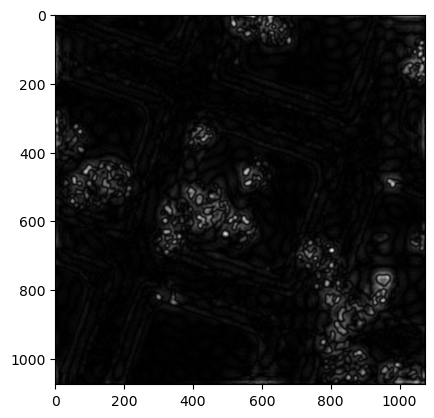

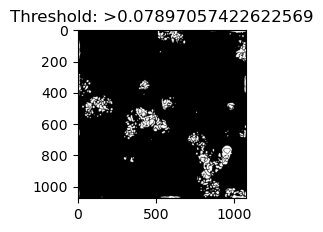

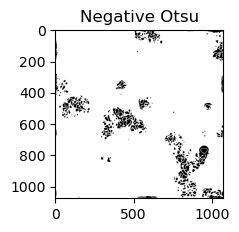

In [ ]:
pixelsize_img4 = img4.data.shape
img4_mask = masks.create_bandpass_mask(pixelsize_img4, 100, 4, 3)
img4fft = np.fft.ifftshift(img4_mask * np.fft.fftshift(np.fft.fft2(img4)))
final_img = np.abs(np.fft.ifft2(img4fft))
plt.imshow(final_img, cmap = 'gray')
plt.show()

threshold  = filters.threshold_otsu(final_img)
binary_img = (final_img > threshold)*1

plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
plt.imshow(binary_img, cmap='gray')
plt.show()

negative = 1 - binary_img
plt.subplot(2,2,2)
plt.title("Negative Otsu")
plt.imshow(negative, cmap='gray')
plt.show()


SyntaxError: EOL while scanning string literal (710469802.py, line 1)